# Linear Regression with synthetic data

$ y = \frac{1}{2}x - 1$

## 01. Load Data

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch 
import torch.nn as nn 


In [2]:
N = 20
D = 1
#uniform distributed data (-5,+5)
X = np.random.random(N)* 10 - 5
#a line plus some gaussian noise (mean = 0, variance = 1)
'''
When we have gaussian noise the MSE become the correct loss
function to use 
'''
Y = 0.5*X -1 + np.random.randn(N)

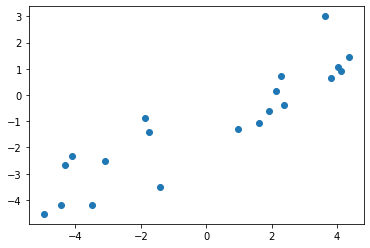

In [3]:
plt.scatter(X,Y);

In [4]:
#(num_samples x num_dimensions)
X = X.reshape(N,D)
Y = Y.reshape(N,D)

## 02. Create a Model

In [5]:
model = nn.Linear(D,1)

### Loss Function

$MSE = \frac{1}{N}\sum_{i = 1}^{N} {(y_i - \hat{y_i})}^2$

In [6]:
criterion = nn.MSELoss()

### Optimizer

Stochastic Gradient Descent 

In [7]:
optimizer = torch.optim.SGD(model.parameters(),lr = 0.01)

## 03. Train the Model 

#### Change inputs/outputs to torch tensors

In [8]:
'''
Pytorch does not work with Numpy Arrays, but with Torch Tensors
Pytorch uses float32 by default, Numpy Creates float64 by default 
'''
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [9]:
type(inputs)

torch.Tensor

In [10]:
epochs = 30
train_losses = []
for it in range(epochs):
  #zero the parameters gradients
  '''
  Internally Pytorch accumulates gradient when we call backward()
  Linear Regression does not require to accumulate gradients 
  With this line we are cleaning them 
  ''' 
  optimizer.zero_grad()

  #forward
  outputs = model(inputs)#__call__ function 
  loss = criterion(outputs,targets)

  #from (1,1) Tensor to a float
  train_losses.append(loss.item())

  #backard & optimize
  loss.backward() # calculate gradients
  optimizer.step() # apply the gradient descent step (THETA = THETA - lr*gradeint)

  

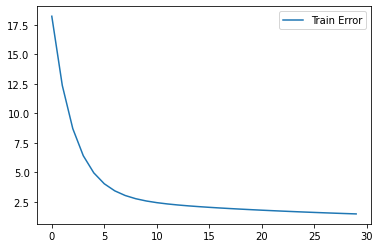

In [11]:
plt.plot(train_losses,label = 'Train Error')
plt.legend()
plt.show()

## 04. Make Predictions

In [12]:
#Convert back to numpy arrays
#detach from graph
'''
Pytorch behind the scenes is creating a graph and keep track of 
the gradients, we need to detach the tensor from the graph 
'''
predictions = model(inputs).detach().numpy()

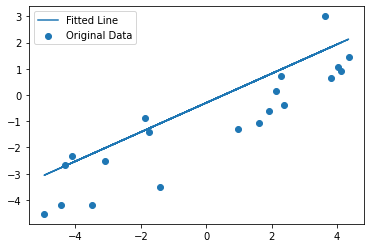

In [13]:
plt.scatter(X,Y,label = "Original Data")
plt.plot(X,predictions,label = "Fitted Line")
plt.legend()
plt.show()

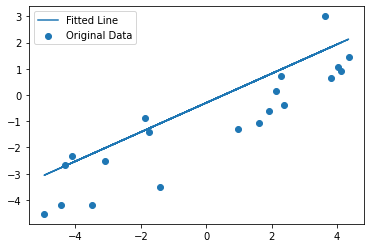

In [14]:
#Second approach 
'''
With this approach we are telling PyTorch to not 
compute gradients
'''
with torch.no_grad():
  out = model(inputs).numpy()
plt.scatter(X,Y,label = "Original Data")
plt.plot(X,out,label = "Fitted Line")
plt.legend()
plt.show()

## 05. Check Model Params

In [15]:
w = model.weight.data.numpy()
b = model.bias.data.numpy()

(w,b)

(array([[0.5569194]], dtype=float32), array([-0.29666635], dtype=float32))